# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

# Решение

In [1]:
import pandas
import numpy
from pandas import DataFrame
from matplotlib import pyplot

In [2]:
def get_geo_data():
    return pandas.read_excel('geo.xlsx', index_col=0)

geo_data: DataFrame = get_geo_data()

In [3]:
geo_data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


### Разделение города на районы безотносительно голосов

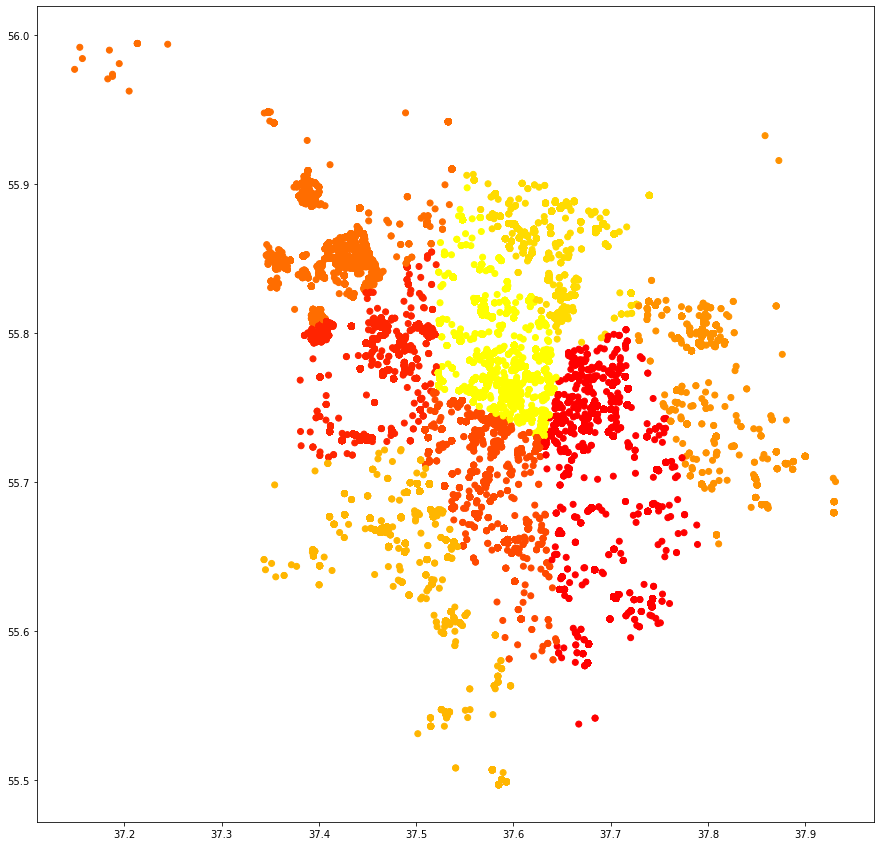

In [4]:
from sklearn.cluster import MiniBatchKMeans

def show_position(data, n_clusters=8):
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    clusters = mini_batch_kmeans.fit_predict(data[['x', 'y']])

    pyplot.figure(figsize=(15, 15))
    pyplot.scatter(
        data['x'],
        data['y'],
        c=clusters,
        cmap='autumn')
    pyplot.show()

show_position(data=geo_data)

### Скопления голосов

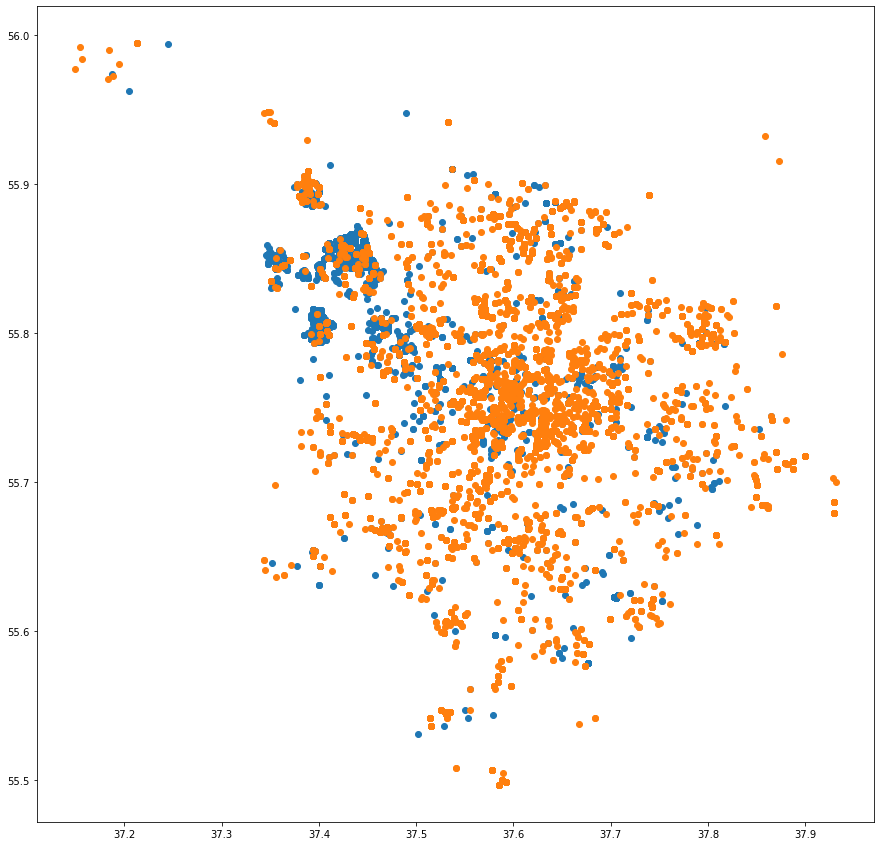

In [5]:
def show_origin_geo_data(data):
    positive = data.loc[data['comment_class'] == 1]
    negative = data.loc[data['comment_class'] == -1]

    pyplot.figure(figsize=(15, 15))
    pyplot.scatter(positive['x'], positive['y'])
    pyplot.scatter(negative['x'], negative['y'])
    pyplot.show()

show_origin_geo_data(data=geo_data)

### Подбор оптимального число кластеров

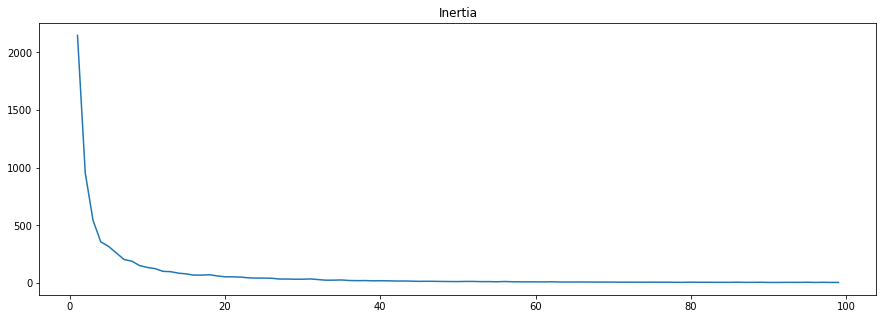

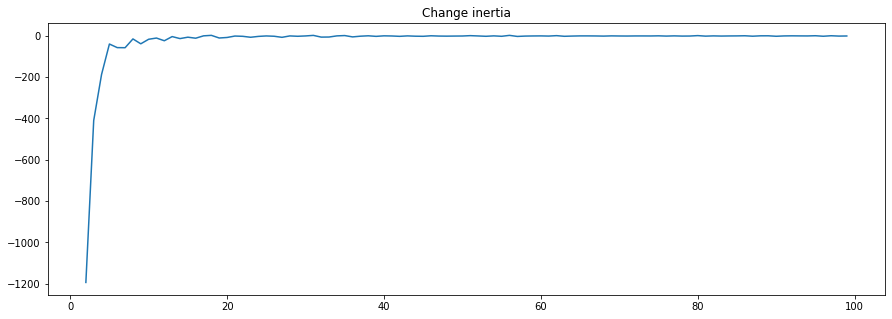

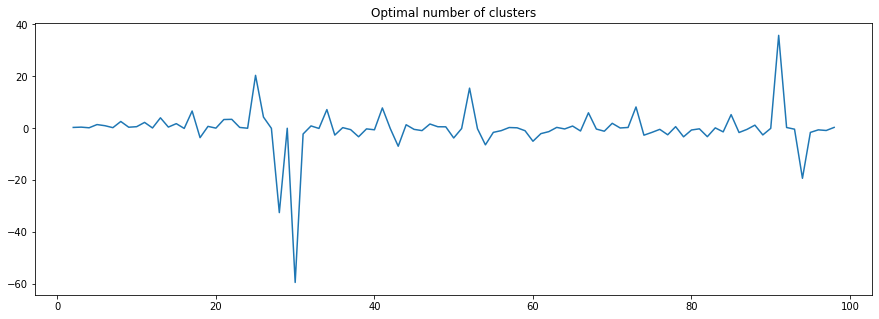

inertia: 30


In [14]:
from sklearn.cluster import MiniBatchKMeans

def show_optimal_number_of_clusters(data, max_epoch=100):
    inertia = []
    clusters_range = range(1, max_epoch)

    for index in clusters_range:
        mini_batch_kmeans = MiniBatchKMeans(n_clusters=index)
        mini_batch_kmeans.fit(data)
        inertia.append(mini_batch_kmeans.inertia_)

    pyplot.figure(figsize=(15, 5))
    pyplot.plot(clusters_range, inertia)
    pyplot.title(label='Inertia')
    pyplot.show()

    diff = numpy.diff(inertia)

    pyplot.figure(figsize=(15, 5))
    pyplot.plot(clusters_range[1:], diff)
    pyplot.title(label='Change inertia')
    pyplot.show()

    diff_r = diff[1:] / diff[:-1]

    pyplot.figure(figsize=(15, 5))
    pyplot.plot(clusters_range[1:-1], diff_r)
    pyplot.title(label='Optimal number of clusters')
    pyplot.show()

    print('inertia: {}'.format(clusters_range[numpy.argmin(diff_r) + 1]))


show_optimal_number_of_clusters(data=geo_data[['x', 'y']])

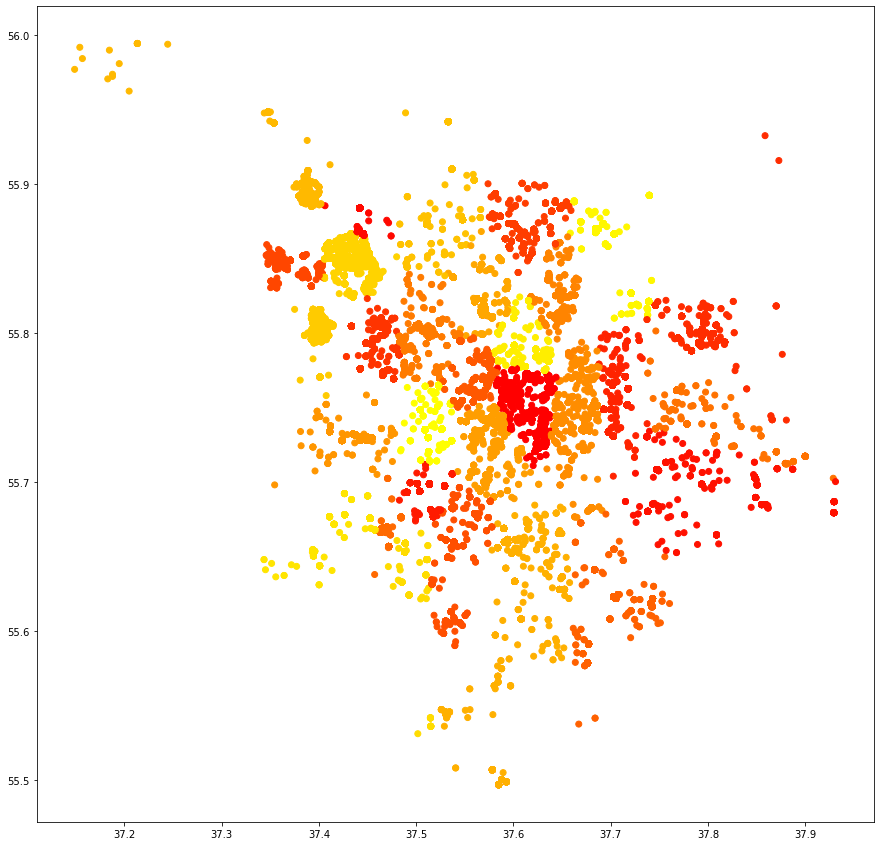

In [15]:
show_position(
    data=geo_data,
    n_clusters=30)